In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error


# Load the dataset

In [3]:
data = pd.read_csv("sales_data.csv")

# Split the data into features and target variable

In [4]:
X = data.drop("Sales", axis=1)
y = data["Sales"]


# Perform one-hot encoding for categorical features

In [5]:
X = pd.get_dummies(X)

# Split the data into training and testing sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model

In [7]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Make predictions on the test set

In [8]:
y_pred = model.predict(X_test)

# Evaluate the model

In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test) 

In [10]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.4374328500000009
R-squared: 0.9534827934927883


# Plot actual vs. predicted sale

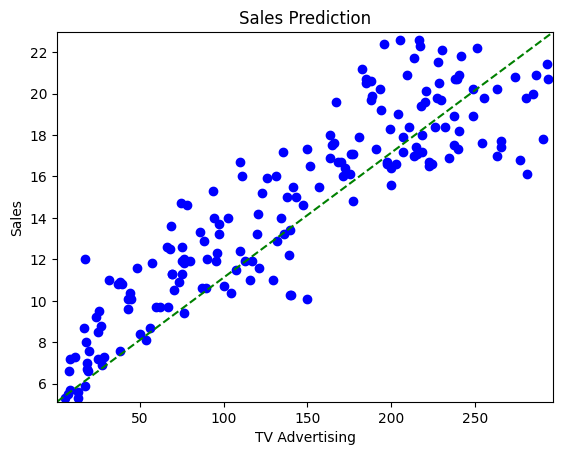

In [11]:
plt.scatter(data["TV"], data["Sales"], color="blue") 
plt.plot([data["TV"].min(), data["TV"].max()], [y_pred.min(), y_pred.max()], color="green", linestyle="--") 
plt.xlabel("TV Advertising")
plt.ylabel("Sales")
plt.title("Sales Prediction")
plt.xlim(data["TV"].min(), data["TV"].max()) 
plt.ylim(y_pred.min(), y_pred.max()) 
plt.show()

# Visualize the feature importance using a bar plot

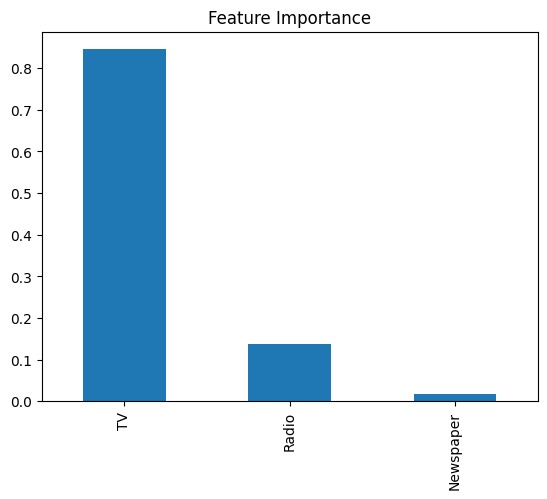

In [12]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.show()

# Use cross-validation to improve the model's generalization

In [13]:
cv_scores = cross_val_score(model, X, y, cv=5)
print('Cross-Validation Scores:')
print(cv_scores)
print('Mean Cross-Validation Score:', np.mean(cv_scores))

Cross-Validation Scores:
[0.93416583 0.97275478 0.94442102 0.90784741 0.94911315]
Mean Cross-Validation Score: 0.9416604403430396


# Plot the residuals vs. predicted sales

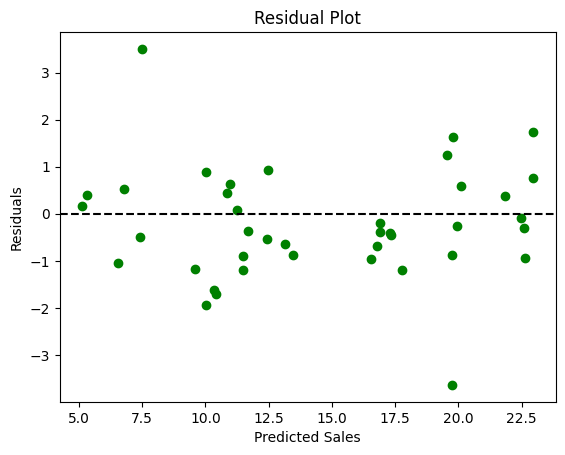

In [14]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color="green")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()